In [26]:
!pip install tensorflow
!pip install scikeras
# !pip install --force-reinstall -v "scikeras==0.12.0"

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [122]:
df = pd.read_csv("final_df.csv")

In [123]:
label_df = df[["TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.000.000,4
1,15318,6458500,41,2248000,4.400.000,190
2,15325,930000,7,186000,4.900.000,7
3,15325,1213000,5,630500,4.100.000,33
4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.000.000,4
2505,15228,1086891979,403,270673633,4.400.000,343
2506,15310,3465000,165,1816000,5.000.000,1
2507,15344,2687000,8,440000,4.600.000,60


In [124]:
df = df.drop(columns=['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 
                      'review_rating', 'review_count','Unnamed: 0.1'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category,Last1MothNominal,market_share,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,60,976949084,4.110874,Kafe dan Minuman,447000,0.000458,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,3,177,2297219696,5.181784,Otomotif,2248000,0.000979,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,0,28,153064649,3.367296,Restoran Umum,186000,0.001215,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,2,70,813504922,4.262680,Apotek dan Produk Kesehatan Lainnya,630500,0.000775,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,5,49,232321665,3.912023,Restoran Umum,2630000,0.011321,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,1,69,525602305,4.248495,Retail,491000,0.000934,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,7,57,829581740,4.060443,Materials,270673633,0.326277,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,1,44,421505251,3.806662,Kafe dan Minuman,1816000,0.004308,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,31,60142072,3.465736,Retail,440000,0.007316,0.290323,2.612903,4406.225806


In [125]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'Kelurahan', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       

In [126]:
final_df = df.drop(columns=['Last1MothNominal','Kelurahan','category','market_share','Last1MothNominal'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.262680,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,10,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [127]:
X = final_df.values
Y = df["Last1MothNominal"].values

In [6]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input

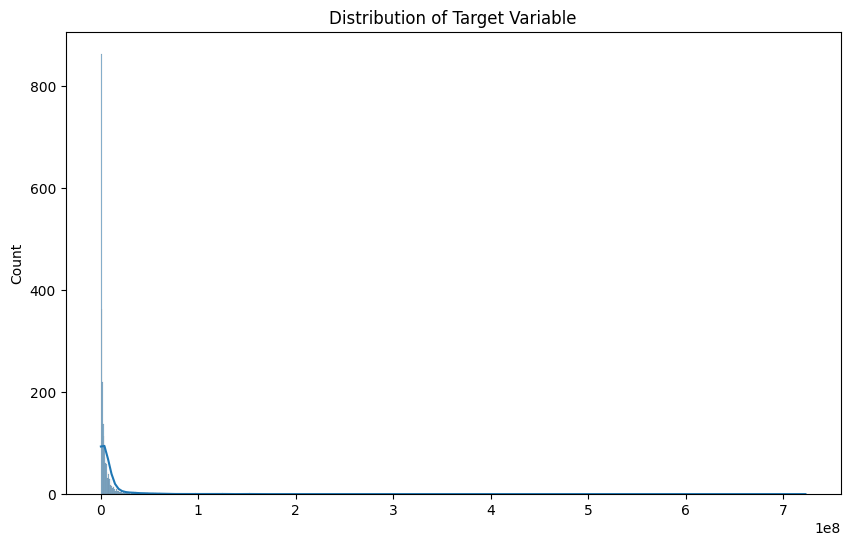

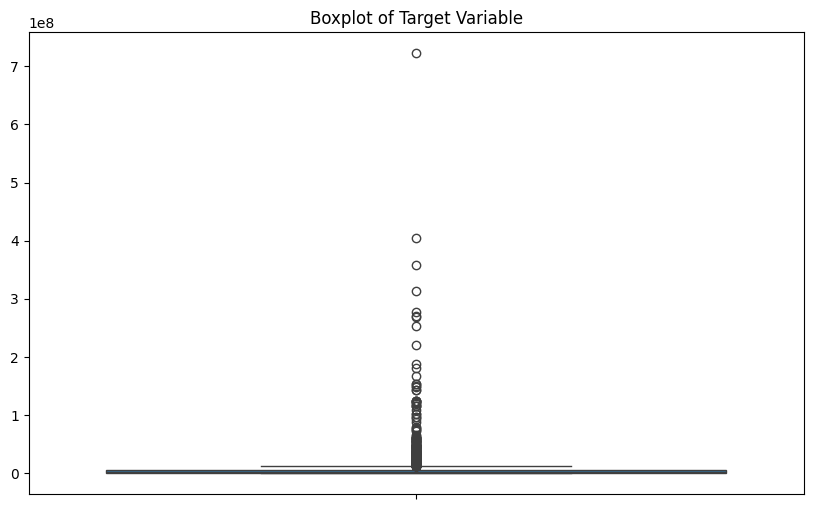

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y)
plt.title('Boxplot of Target Variable')
plt.show()

In [129]:
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = np.where((Y < lower_bound) | (Y > upper_bound))[0]
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers}")

Lower bound: -6509500.0
Upper bound: 11958500.0
Number of outliers: 274
Indices of outliers: [   9   10   26   27   43   58   66   68  105  118  128  130  134  142
  148  153  188  194  198  206  210  226  236  239  256  286  294  301
  317  325  327  331  337  339  343  350  353  357  361  362  363  364
  387  395  407  417  428  447  471  472  479  488  490  491  494  507
  516  522  531  534  537  541  545  546  547  569  570  576  604  605
  606  615  620  623  654  659  679  682  683  704  708  727  739  740
  742  754  755  761  766  775  782  801  819  821  835  841  849  890
  904  922  951  954  956  980  981  984  990  998 1000 1002 1008 1039
 1046 1070 1089 1109 1121 1125 1126 1151 1152 1156 1159 1163 1170 1185
 1208 1209 1225 1229 1242 1246 1252 1255 1282 1288 1293 1299 1336 1350
 1376 1381 1383 1388 1389 1395 1398 1404 1409 1410 1423 1428 1437 1451
 1455 1459 1461 1469 1471 1478 1485 1502 1504 1508 1510 1511 1521 1530
 1535 1538 1550 1556 1573 1574 1580 1586 1593 1608 1611

In [130]:
Y_clean = Y[(Y >= lower_bound) & (Y <= upper_bound)]
X_clean = X[(Y >= lower_bound) & (Y <= upper_bound)]

In [39]:
z_scores = np.abs(stats.zscore(Y))
z_score_threshold = 3
outliers_z = np.where(z_scores > z_score_threshold)[0]
print(f"Number of outliers (Z-score method): {len(outliers_z)}")
print(f"Indices of outliers (Z-score method): {outliers_z}")

Number of outliers (Z-score method): 34
Indices of outliers (Z-score method): [ 153  286  361  364  545  623  739  922 1039 1151 1185 1383 1388 1398
 1404 1455 1478 1504 1508 1511 1611 1718 1746 1808 1825 2189 2213 2246
 2250 2314 2321 2447 2467 2505]


In [40]:
# # Method 2: Z-score
# Y_clean = Y[z_scores <= z_score_threshold]
# X_clean = X[z_scores <= z_score_threshold]

In [131]:
print(f"Original dataset size: {len(Y)}")
print(f"Cleaned dataset size: {len(Y_clean)}")

Original dataset size: 2509
Cleaned dataset size: 2235


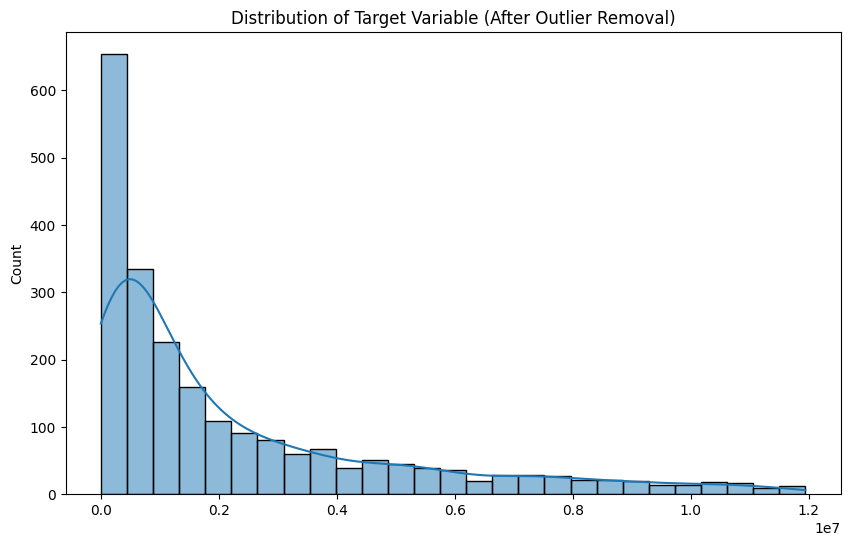

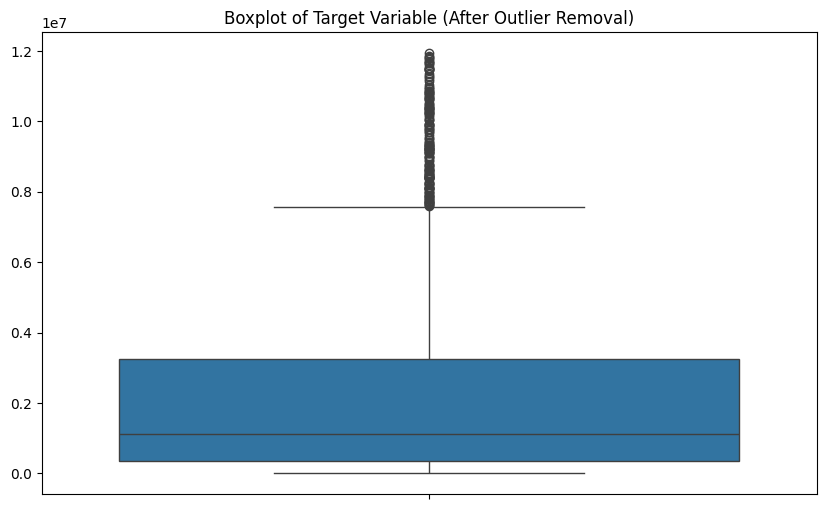

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(Y_clean, kde=True)
plt.title('Distribution of Target Variable (After Outlier Removal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y_clean)
plt.title('Boxplot of Target Variable (After Outlier Removal)')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# X_transformed = scaler.fit_transform(X_clean)
# # Y_transformed = scaler.transform()

In [133]:
df = pd.DataFrame(data=X_clean,columns=final_df.columns)
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,23,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333
2231,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2232,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2233,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [134]:
df["Last1MonthNominal"] = Y_clean
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,Last1MonthNominal
0,5,False,False,False,False,True,False,False,False,False,...,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,447000
1,2,False,False,False,False,False,False,False,False,False,...,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011,2248000
2,10,False,False,False,False,False,False,False,False,False,...,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,186000
3,2,True,False,False,False,False,False,False,False,False,...,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286,630500
4,25,False,False,False,False,False,False,False,False,False,...,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,2630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,23,False,False,False,False,False,False,False,False,False,...,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333,89000
2231,7,False,False,False,False,False,False,False,False,False,...,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754,491000
2232,8,False,False,False,False,True,False,False,False,False,...,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636,1816000
2233,9,False,False,False,False,False,False,False,False,False,...,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806,440000


In [47]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [17]:
# df = final_df

In [21]:
testString ="4.000.000"
def remove_nth_character(string, n):
  return string[:n] + string[n+1:]

print(remove_nth_character(testString,5))

4.000000


In [22]:
df['review_rating'] = df["review_rating"].apply(lambda x: remove_nth_character(x,5))
df

,Unnamed: 0,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,0,5,False,False,False,False,True,False,False,False,...,1,5,0,1,15225,1772000,24,447000,4.000000,4
1,1,2,False,False,False,False,False,False,False,False,...,0,3,9,3,15318,6458500,41,2248000,4.400000,190
2,2,10,False,False,False,False,False,False,False,False,...,1,1,0,0,15325,930000,7,186000,4.900000,7
3,3,2,True,False,False,False,False,False,False,False,...,1,0,0,2,15325,1213000,5,630500,4.100000,33
4,4,25,False,False,False,False,False,False,False,False,...,0,2,0,5,15413,12818000,129,2630000,4.400000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2504,7,False,False,False,False,False,False,False,False,...,22,2,0,1,15220,1088729,7,491000,5.000000,4
2505,2505,1,False,False,False,False,False,False,False,True,...,10,4,1,7,15228,1086891979,403,270673633,4.400000,343
2506,2506,8,False,False,False,False,True,False,False,False,...,0,0,2,1,15310,3465000,165,1816000,5.000000,1
2507,2507,9,False,False,False,False,False,False,False,False,...,0,4,2,0,15344,2687000,8,440000,4.600000,60


In [48]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                         kompetitor_in_kelurahan  \
kompetitor_in_kelurahan                                 1.000000   
Apotek dan Produk Kesehatan Lainnya                    -0.128299   
Clothing                                               -0.061125   
Entertainment                                          -0.043008   
Jasa                                                   -0.060050   
...                                                          ...   
jumlah_Mall_per_kelurahan                               0.051638   
jumlah_Mosques_per_kelurahan                            0.018341   
jumlah_Transportation Hub_per_kelurahan                 0.292207   
jumlah_Medical Services_per_kelurahan                   0.084102   
Last1MonthNominal                                      -0.002504   

                                         Apotek dan Produk Kesehatan Lainnya  \
kompetitor_in_kelurahan                                            -0.128299   
Apo

In [49]:
# Identify highly correlated features
high_corr = np.abs(correlation_matrix) > 0.8
print("\nHighly correlated features:")
print(high_corr.sum() - 1)  # Subtract 1 to not count self-correlations


Highly correlated features:
kompetitor_in_kelurahan                    0
Apotek dan Produk Kesehatan Lainnya        0
Clothing                                   0
Entertainment                              0
Jasa                                       0
                                          ..
jumlah_Mall_per_kelurahan                  0
jumlah_Mosques_per_kelurahan               0
jumlah_Transportation Hub_per_kelurahan    0
jumlah_Medical Services_per_kelurahan      0
Last1MonthNominal                          0
Length: 76, dtype: int64


In [51]:
X = df.drop('Last1MonthNominal', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVIF for each feature:")
print(vif_data.sort_values('VIF', ascending=False))

C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for each feature:
                          feature        VIF
17                  Restoran Umum        inf
14                       Printing        inf
44               penduduk_pelajar        inf
45             penduduk_pensiunan        inf
46               penduduk_bekerja        inf
..                            ...        ...
30     penduduk_beragama_konghucu  65.958938
31  penduduk_beragama_kepercayaan  35.586115
70   jumlah_Tourist_per_kelurahan  27.924999
32         penduduk_belum_sekolah  27.194556
0         kompetitor_in_kelurahan   4.250557

[75 rows x 2 columns]


In [52]:
X.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [95]:
# define base model
def baseline_model():
    # create model
    model = Sequential([
        Input(shape=(X_transformed.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [96]:
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)


kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_transformed, Y_clean, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -7620283285924.91 (788490367402.22) MSE


In [98]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 919.0 kB/s eta 0:00:11
   ---------------------------------------- 0.1/9.8 MB 919.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.8 MB 1.0 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.8 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/9.8 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 2.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.5/9.8 MB 2.8 MB/s eta 0:00:04
   ------- -----------

In [100]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

TypeError: C variable sklearn.utils._random.DEFAULT_SEED has wrong signature (expected __pyx_t_7sklearn_5utils_7_random_UINT32_t, got __pyx_t_7sklearn_5utils_9_typedefs_uint32_t)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   kompetitor_in_kelurahan                       2235 non-null   object
 1   Apotek dan Produk Kesehatan Lainnya           2235 non-null   object
 2   Clothing                                      2235 non-null   object
 3   Entertainment                                 2235 non-null   object
 4   Jasa                                          2235 non-null   object
 5   Kafe dan Minuman                              2235 non-null   object
 6   Kebersihan                                    2235 non-null   object
 7   Kosmetik                                      2235 non-null   object
 8   Materials                                     2235 non-null   object
 9   Olahraga                                      2235 non-null   object
 10  

In [54]:
df.isnull().sum()

kompetitor_in_kelurahan                    0
Apotek dan Produk Kesehatan Lainnya        0
Clothing                                   0
Entertainment                              0
Jasa                                       0
                                          ..
jumlah_Mall_per_kelurahan                  0
jumlah_Mosques_per_kelurahan               0
jumlah_Transportation Hub_per_kelurahan    0
jumlah_Medical Services_per_kelurahan      0
Last1MonthNominal                          0
Length: 76, dtype: int64

In [59]:
# 2. Check for non-linear relationships
def plot_scatter_with_lowess(x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    sns.regplot(x=x, y=y, lowess=True, line_kws={'color': 'red'})
    plt.title(title)
    plt.show()

for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'Last1MonthNominal':
        plot_scatter_with_lowess(df[column], df['Last1MonthNominal'], f'{column} vs Last1MonthNominal')


In [61]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [62]:
# 3. Feature engineering examples
public_places_array = ["jumlah_Parks_per_kelurahan",'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan',]
df['total_public_places'] = df[public_places_array].sum(axis=1)

# df['merchant_density'] = df['kompetitor_in_kelurahan'] / df['total_public_places']

ZeroDivisionError: division by zero

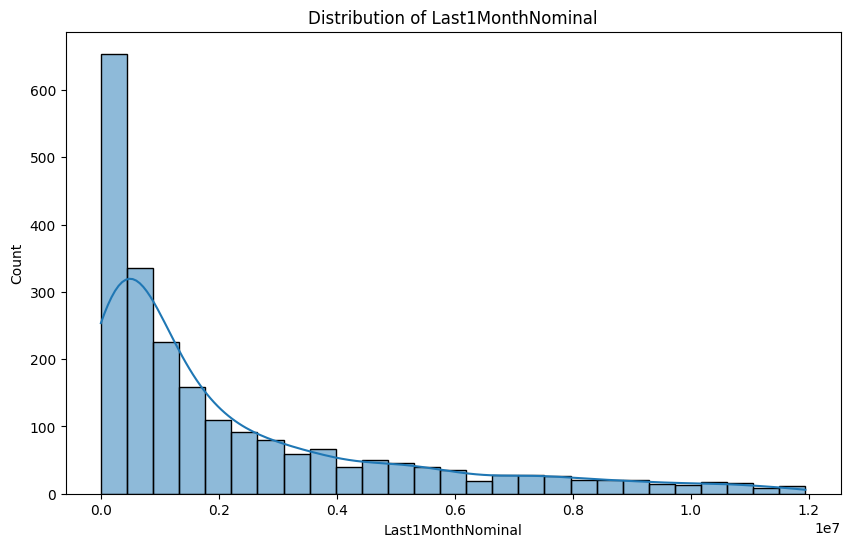

In [63]:
def plot_distribution(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

plot_distribution(df, 'Last1MonthNominal')

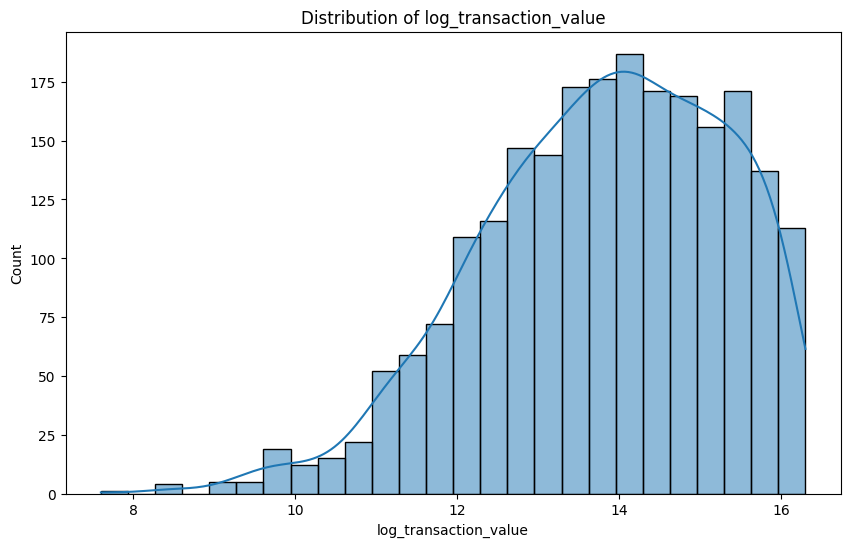

In [64]:
df['log_transaction_value'] = np.log1p(df['Last1MonthNominal'])
plot_distribution(df, 'log_transaction_value')

In [66]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [67]:
# Use Yeo-Johnson transform on features
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df.select_dtypes(include=[np.number])), 
                              columns=df.select_dtypes(include=[np.number]).columns)

In [71]:
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Offices_per_kelurahan,jumlah_Residences_per_kelurahan,jumlah_Tourist_per_kelurahan,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,Last1MonthNominal,total_public_places,log_transaction_value
0,5,False,False,False,False,True,False,False,False,False,...,1,0,0,1,5,0,1,447000,20,13.010316
1,2,False,False,False,False,False,False,False,False,False,...,8,6,0,0,3,9,3,2248000,48,14.625552
2,10,False,False,False,False,False,False,False,False,False,...,2,1,0,1,1,0,0,186000,13,12.133507
3,2,True,False,False,False,False,False,False,False,False,...,4,0,0,1,0,0,2,630500,22,13.354270
4,25,False,False,False,False,False,False,False,False,False,...,0,7,0,0,2,0,5,2630000,17,14.782495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,23,False,False,False,False,False,False,False,False,False,...,7,50,0,22,2,0,1,89000,91,11.396403
2231,7,False,False,False,False,False,False,False,False,False,...,7,50,0,22,2,0,1,491000,91,13.104201
2232,8,False,False,False,False,True,False,False,False,False,...,2,12,0,0,0,2,1,1816000,26,14.412147
2233,9,False,False,False,False,False,False,False,False,False,...,5,4,0,0,4,2,0,440000,20,12.994532


In [74]:
df_transformed

,Last1MonthNominal,log_transaction_value
0,-0.612825,-0.610982
1,0.491606,0.500605
2,-1.111156,-1.117773
3,-0.399108,-0.394153
4,0.613566,0.621656
...,...,...
2230,-1.483139,-1.495105
2231,-0.555557,-0.552828
2232,0.330221,0.339824
2233,-0.622375,-0.620684


In [72]:
X = df.drop(['Last1MonthNominal', 'log_transaction_value'], axis=1)
y = df['log_transaction_value']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
                                        feature  importance
0                       kompetitor_in_kelurahan    0.128074
1                              Kafe dan Minuman    0.046772
2  jumlah_Temporary Accomodations_per_kelurahan    0.043456
3                Roti, Kue, dan Cemilan Lainnya    0.035135
4               Peralatan dan Barang Elektronik    0.032299
5                                        Retail    0.027905
6                                      Regional    0.025589
7                      penduduk_beragama_buddha    0.023831
8                                      Otomotif    0.023258
9                     penduduk_beragama_kristen    0.022613


In [76]:
y.describe()

count    2235.000000
mean       13.791472
std         1.515156
min         7.601402
25%        12.771389
50%        13.929733
75%        14.993229
max        16.295572
Name: log_transaction_value, dtype: float64

In [77]:
df["Last1MonthNominal"].describe()

count    2.235000e+03
mean     2.294280e+06
std      2.729081e+06
min      2.000000e+03
25%      3.520000e+05
50%      1.121000e+06
75%      3.247000e+06
max      1.194200e+07
Name: Last1MonthNominal, dtype: float64

In [73]:
# 9. Model performance
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"\nRandom Forest RMSE: {rmse_scores.mean()} (+/- {rmse_scores.std() * 2})")


Random Forest RMSE: 1.62244499192068 (+/- 0.08515889613155303)


In [225]:
Y.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [75]:
X.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [79]:
import pickle

In [80]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RMSE on original scale: 3036538.298448134
MAE on original scale: 1910892.3001525013
R2 Score: -0.20265325555124947
Mean Percentage Error: 364.6985262885097%
Median Percentage Error: 80.35664255366063%


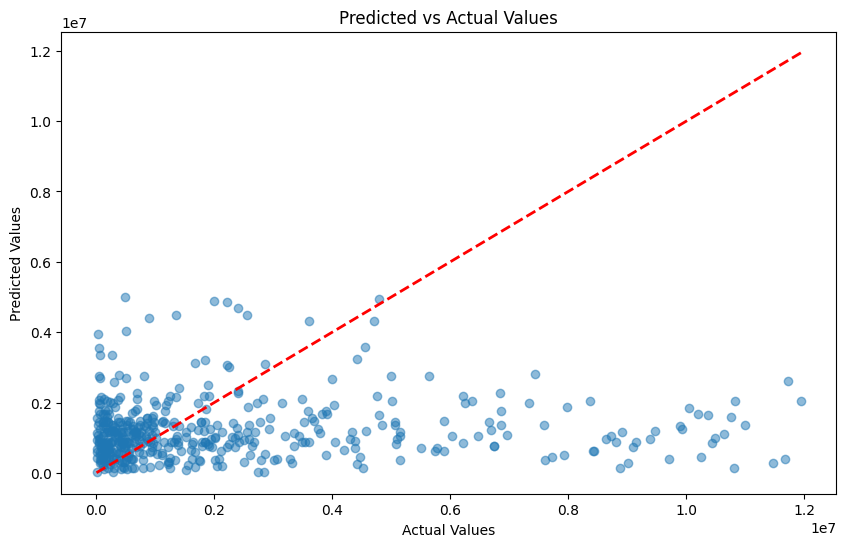

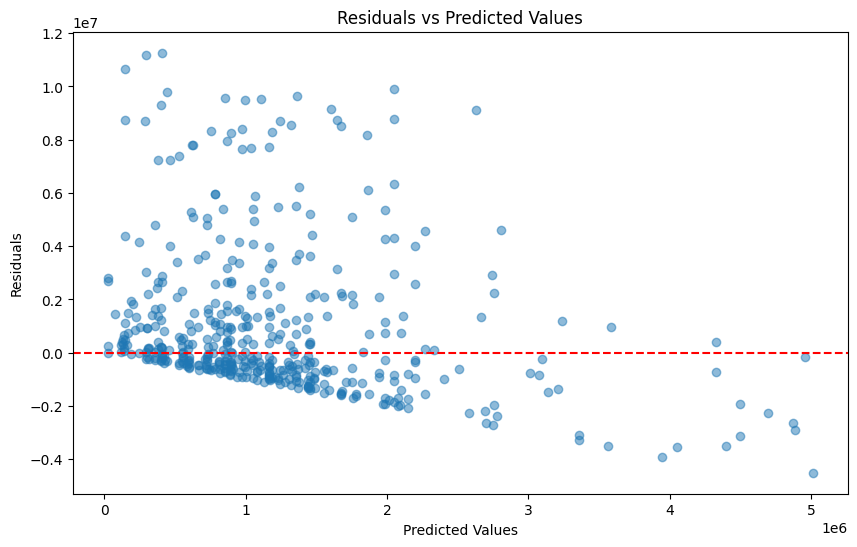


Top 10 important features:
                                        feature  importance
0                       kompetitor_in_kelurahan    0.129528
1                              Kafe dan Minuman    0.052619
2  jumlah_Temporary Accomodations_per_kelurahan    0.031358
3                                        Retail    0.029610
4                Roti, Kue, dan Cemilan Lainnya    0.029049
5               Peralatan dan Barang Elektronik    0.026841
6                                    Kebersihan    0.025774
7                                   penduduk_s3    0.025625
8                                   penduduk_SD    0.025393
9                       penduduk_beragama_hindu    0.025222


In [83]:
# Assuming you have your features in X and log-transformed target in y_log
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)

# Make predictions
y_pred_log = rf_model.predict(X_test)

# Back-transform predictions and actual values
y_pred = np.exp(y_pred_log) - 1  # Assuming you used np.log1p for transformation
y_test = np.exp(y_test_log) - 1

# Calculate metrics on the original scale
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on original scale: {rmse}")
print(f"MAE on original scale: {mae}")
print(f"R2 Score: {r2}")

# Calculate percentage error
percentage_error = np.abs((y_test - y_pred) / y_test) * 100
mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)

print(f"Mean Percentage Error: {mean_percentage_error}%")
print(f"Median Percentage Error: {median_percentage_error}%")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 important features:")
print(feature_importance.head(10))

# Final Model

In [84]:
!pip install xgboost
!pip install lightgbm

In [145]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

In [143]:
len(X.columns)

81

In [140]:
X = df.drop('Last1MonthNominal',axis=1)

In [135]:
y = df['Last1MonthNominal']
y

0        447000
1       2248000
2        186000
3        630500
4       2630000
         ...   
2230      89000
2231     491000
2232    1816000
2233     440000
2234    5098000
Name: Last1MonthNominal, Length: 2235, dtype: int64

In [ ]:
# Feature engineering based on business density
def engineer_density_features(df):
    # Assuming 'businesses_in_category' and 'total_businesses' columns exist
    df['category_density'] = df['businesses_in_category'] / df['total_businesses']
    df['log_businesses_in_category'] = np.log1p(df['businesses_in_category'])
    
    # Create interaction terms
    df['density_x_population'] = df['category_density'] * df['population']
    df['density_x_income'] = df['category_density'] * df['average_income']
    
    # You might need to adjust these based on your actual column names
    return df

RandomForestRegressor:
  RMSE: 2925856.6560241766
  R2 Score: -0.11657781762495056
GradientBoostingRegressor:
  RMSE: 2795721.9366431283
  R2 Score: -0.01946155677791861
XGBRegressor:
  RMSE: 3051686.8870648174
  R2 Score: -0.2146826982498169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2882
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 72
[LightGBM] [Info] Start training from score 2304784.861857
LGBMRegressor:
  RMSE: 2945747.933947869
  R2 Score: -0.131811412156301
HuberRegressor:
  RMSE: 2800800.128826329
  R2 Score: -0.023168451552812996
RANSACRegressor:
  RMSE: 4479816.992937609
  R2 Score: -1.6176010170856348
SVR:
  RMSE: 2987039.8480004
  R2 Score: -0.16376405121518656


C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor:
  RMSE: 3562918.219389694
  R2 Score: -0.6557494258490264


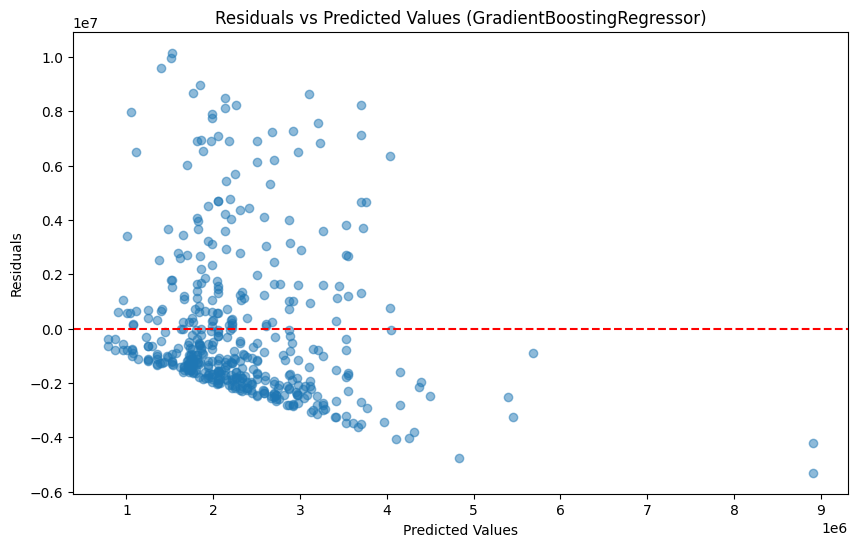


Top 10 important features:
                                         feature  importance
80                          density_x_population    0.113362
78                      category_density_in_area    0.078990
79                             competition_index    0.059647
76              sum_transaction_nominal_per_area    0.053338
29                      penduduk_beragama_buddha    0.044162
63  jumlah_Temporary Accomodations_per_kelurahan    0.044017
11                                      Otomotif    0.043845
34                                   penduduk_SD    0.032445
27                    penduduk_beragama_katholik    0.029109
5                               Kafe dan Minuman    0.028646

Cross-validation RMSE for GradientBoostingRegressor: 2749185.4086261317 (+/- 225441.6860011585)


In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame with features and 'transaction_value' as target
# X = df.drop('transaction_value', axis=1)
# y = df['transaction_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}:")
    print(f"  RMSE: {np.sqrt(mse)}")
    print(f"  R2 Score: {r2}")
    return model, y_pred

# List of models to try
models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42),
    xgb.XGBRegressor(random_state=42),
    lgb.LGBMRegressor(random_state=42),
    HuberRegressor(),
    RANSACRegressor(random_state=42),
    SVR(kernel='rbf'),
    MLPRegressor(random_state=42)
]

# Evaluate each model
results = {}
for model in models:
    fitted_model, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model.__class__.__name__] = (fitted_model, y_pred)

# Plot residuals for the best performing model
best_model_name = max(results, key=lambda k: r2_score(y_test, results[k][1]))
_, best_y_pred = results[best_model_name]

plt.figure(figsize=(10, 6))
plt.scatter(best_y_pred, y_test - best_y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title(f"Residuals vs Predicted Values ({best_model_name})")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature importance for tree-based models
if isinstance(results[best_model_name][0], (RandomForestRegressor, GradientBoostingRegressor, xgb.XGBRegressor, lgb.LGBMRegressor)):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': results[best_model_name][0].feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 10 important features:")
    print(feature_importance.head(10))

# Cross-validation for the best model
best_model = results[best_model_name][0]
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"\nCross-validation RMSE for {best_model_name}: {cv_rmse.mean()} (+/- {cv_rmse.std() * 2})")

In [146]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [154]:
df['density_x_population'].isna().sum()

0

In [149]:
final_df = df

In [158]:
for col in df.columns:
    # Check if the column exists
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
        continue
    
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Handle potential negative or zero values
    df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number

In [220]:
df = df.drop(['density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index',
       'transaction_per_business'], axis=1)

In [221]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

#Oversampling

In [222]:
Y

array([ 447000, 2248000,  186000, ..., 1816000,  440000, 5098000],
      dtype=int64)

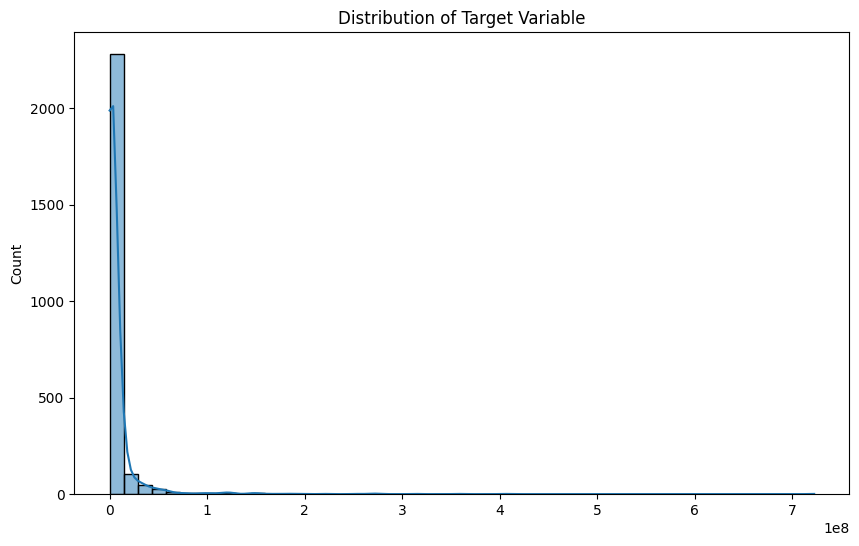

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(Y, bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [193]:
numeric_features = ['density_x_population', 'category_density_in_area', 'competition_index',
                    'jumlah_penduduk_akhir_2023','kompetitor_in_kelurahan',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 'penduduk_60_sampai_64',
       'penduduk_65_sampai_69', 'penduduk_70_keatas',
       'jumlah_Parks_per_kelurahan',
       'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan', 'count_UMKM',
       'sum_transaction_nominal_per_area', 'log_count_UMKM','transaction_per_business',
                   'density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index']
categorical_features = ['Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung']

print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [197]:
print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [188]:
print(df.columns)

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [198]:
# print(df.columns)
comparison_list = []
for column in df.columns:
    if column in categorical_features:
        continue
    if column in numeric_features:
        continue
    if column not in categorical_features and column not in numeric_features:
        print(column, "gamasuk boi")

for column in categorical_features:
    if column in comparison_list:
        print("duplikat", column)
    if column in df.columns:
        comparison_list.append(column)
        continue
    print("gamasuk boi", column)
print(comparison_list)

for column in numeric_features:
    if column in comparison_list:
        print("duplikat", column)
    if column in df.columns:
        comparison_list.append(column)
        continue
    print("gamasuk boi", column)

Last1MonthNominal gamasuk boi
['Apotek dan Produk Kesehatan Lainnya', 'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan', 'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif', 'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti', 'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya', 'Transportation', 'Warung']


In [184]:
print("da")

da


In [212]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for log transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)

# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df


# Anomaly detection
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Prepare data
df = advanced_feature_engineering(df)
df = remove_outliers(df, ['Last1MonthNominal', 'density_x_population', 'category_density_in_area'])

X = df.drop('Last1MonthNominal', axis=1)
y = df['Last1MonthNominal'] #np.log1p(df['Last1MonthNominal'])

In [213]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', LogTransformer()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42))
])

In [214]:
# Fit model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")

def get_feature_importance(model, numeric_features, categorical_features):
    # Get the polynomial feature names
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly.fit(X_train[numeric_features])
    poly_feature_names = poly.get_feature_names_out(numeric_features)
    
    # Combine all feature names in the order they were fed to the model
    all_feature_names = list(poly_feature_names) + categorical_features
    
    # Get feature importances from the model
    importances = model.named_steps['regressor'].feature_importances_
    
    # Create a DataFrame with feature names and their importances
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': importances
    })
    
    # Group by the original feature names and sum the importances
    feature_importance['original_feature'] = feature_importance['feature'].apply(lambda x: x.split()[0] if '^' in x else x)
    grouped_importance = feature_importance.groupby('original_feature')['importance'].sum().reset_index()
    
    # Sort by importance
    grouped_importance = grouped_importance.sort_values('importance', ascending=False)
    
    return grouped_importance

# After fitting your model, use this function:
feature_importance = get_feature_importance(model, numeric_features, categorical_features)

print("\nTop 10 important features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['original_feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Optionally, visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['original_feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [209]:
y_pred_akt = np.exp(y_pred)

In [210]:
mae = mean_absolute_error(y_test, y_pred_akt)
print(mae)

1049103.5216449725


In [211]:
r2 = r2_score(y_test, y_pred)
print(r2)

-0.14935379133138404


In [218]:
mean_actual = np.mean(y_test)
print(mean_actual)

1638043.8861386138


In [216]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred_akt)
rmse = np.sqrt(mse)

# Calculate mean of actual values
mean_actual = np.mean(y_true)

# Calculate percentage error
percentage_error = (rmse / mean_actual) * 100

print(f"RMSE: {rmse}")
print(f"Percentage Error: {percentage_error}%")


ValueError: Found input variables with inconsistent numbers of samples: [404, 408]

In [203]:
with open('model-alt.pkl', 'wb') as f:
    pickle.dump(model, f)